In [1]:
import jax
import jax.numpy as jnp
import jax.scipy as jsp
import matplotlib.pyplot as plt

In [ ]:
class GaussianKernel:
    def __init__(self,
                 domain_size: float,
                 domain_dim: int,
                 alpha: float,
                 sigma: float):
        self.domain_size = domain_size
        self.domain_dim = domain_dim
        self.alpha = alpha
        self.sigma = sigma

    def __str__(self) -> str:
        return f"Gaussian kernel with alpha={self.alpha} and sigma={self.sigma}," \
               f"Kernel dimension={self.kernel_dim}x{self.kernel_dim}"
    
    @property
    def pixel_size(self) -> float:
        return self.domain_size / self.domain_dim
    
    @property
    def kernel_alpha(self) -> float:
        return self.alpha * self.pixel_size
    
    @property
    def kernel_sigma(self) -> float:
        return self.sigma / self.pixel_size
    
    @property
    def kernel_size(self) -> float:
        return 2.0 * self.sigma 
    
    @property
    def kernel_dim(self) -> int:
        return int(2 * jnp.floor(self.kernel_size / self.pixel_size) + 1)
    
    @property
    def kernel_basis(self) -> jnp.ndarray:
        if self.kernel_dim > 1:
            return jnp.linspace(-self.kernel_size, self.kernel_size, self.kernel_dim)
        else:
            return jnp.array([0.0])

    @property
    def kernel(self) -> jnp.ndarray:
        return self.kernel_alpha \
               * self.gaussian_1d_kernel(self.kernel_basis, self.kernel_sigma) \
               * self.gaussian_1d_kernel(self.kernel_basis[: None], self.kernel_sigma)

    def show(self):
        plt.imshow(self.kernel)
        plt.colorbar()
        plt.show()
    
    @staticmethod
    def gaussian_1d_kernel(kernel_basis: jnp.ndarray, sigma: float) -> jnp.ndarray:
        return jnp.exp(-1.0 * (kernel_basis / sigma)**2)
    
    @staticmethod
    def convolve(brownian: jnp.ndarray, kernel: jnp.ndarray) -> jnp.ndarray:
        return jsp.signal.convolve2d(brownian, kernel, mode="same")
    
    def map_to_pixels(self, x_coords: jnp.ndarray) -> jnp.ndarray:
        return (x_coords - (-self.domain_size / 2.0)) / self.pixel_size


In [2]:
import sys
sys.path.append("../")

from utils import eval_Q, sample_ellipse

(-1.5, 1.5)

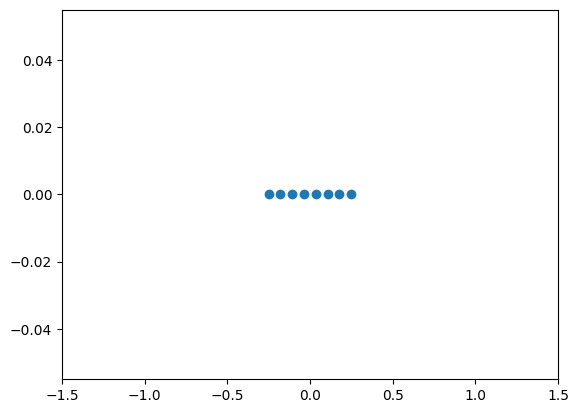

In [17]:
X = jnp.stack([jnp.linspace(-0.25, 0.25, 8), jnp.zeros(8)], axis=1).flatten()
plt.scatter(X.reshape(-1, 2)[:, 0], X.reshape(-1, 2)[:, 1])
plt.xlim(-1.5, 1.5)

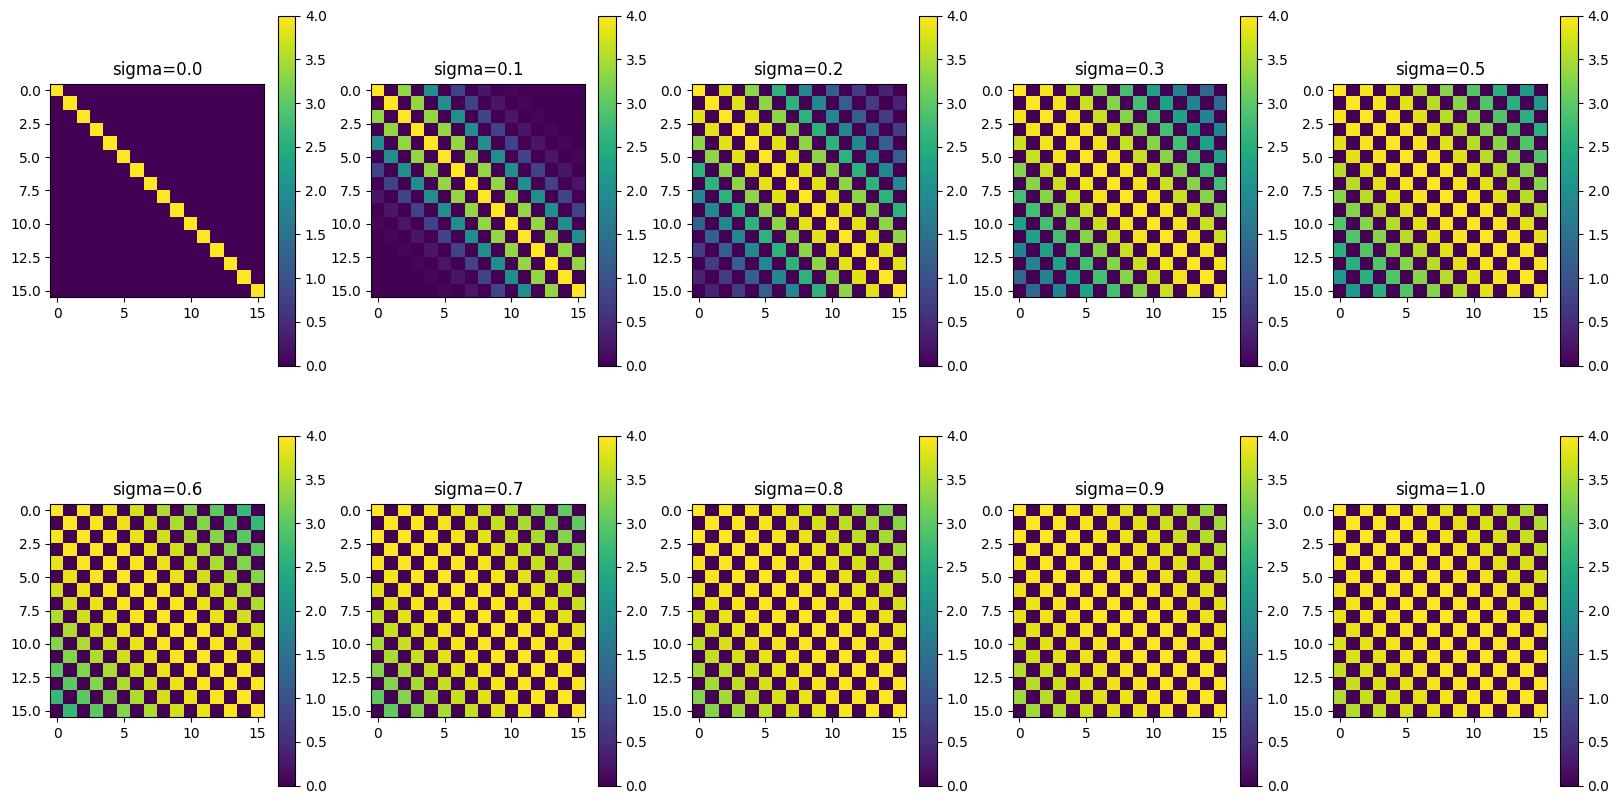

In [18]:
alpha = 2.0
sigma = jnp.linspace(0.01, 1.0, 10)

fig, ax = plt.subplots(2, 5, figsize=(20, 10))
ax = ax.flatten()
for i, s in enumerate(sigma):
    im = ax[i].imshow(eval_Q(X, alpha, sigma=s))
    ax[i].set_title(f"sigma={s:.1f}")
    fig.colorbar(im, ax=ax[i])

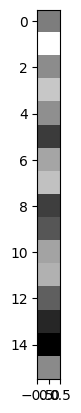

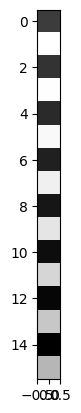

In [19]:
rng = jax.random.PRNGKey(0)
dW = jax.random.normal(rng, shape=(16, 1))
plt.imshow(dW, cmap="gray")
plt.show()
Q = eval_Q(X, alpha, sigma=0.5)
QdW = jnp.dot(Q, dW)
plt.imshow(QdW, cmap="gray")
plt.show()